# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  
* Then construct a frequency table of these values for all people, 
* then for women only, and for men only.  
* Then construct these three frequency tables using only people whose age is between 30 and 40.

In [3]:
da.head(2)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN


In [4]:
# insert your code here
da['DMDMARTLX'] =da.DMDMARTL.replace({
    1:'Married',
    2:'Unmarried',
    3:'Divorced',
    4:'Widowed',
    5:'Separated',
    6:'Divorced',
    77:'Refused',
    99:"Don't Know"
})
da['DMDMARTLX']

0         Married
1        Divorced
2         Married
3        Divorced
4        Divorced
          ...    
5730    Unmarried
5731      Married
5732    Unmarried
5733      Married
5734    Separated
Name: DMDMARTLX, Length: 5735, dtype: object

In [5]:
#for all people 
da['DMDMARTLX'].value_counts()

Married      2780
Divorced     1106
Separated    1004
Unmarried     396
Widowed       186
Refused         2
Name: DMDMARTLX, dtype: int64

In [6]:
# Rename Genders 
da["RIAGENDRx"] =da["RIAGENDR"].replace({
    1:"Male",
    2:"Female"
})

In [7]:
# compare all the groups of age between 30-40 years old 
# make bins of age and then quering them 
da["agegrp"]  = pd.cut(da.RIDAGEYR,[18,30,40,50,60,70,80])

In [8]:
#for men only 
df_male = da.query('RIAGENDRx == "Male"').copy()
x = df_male.DMDMARTLX.value_counts()
x/x.sum()

Married      0.562881
Divorced     0.188262
Separated    0.184451
Unmarried    0.038110
Widowed      0.025915
Refused      0.000381
Name: DMDMARTLX, dtype: float64

In [9]:
#for women only
df_female =da.query('RIAGENDRx == "Female"').copy()
x = df_female.DMDMARTLX.value_counts()
x/x.sum()

Married      0.457193
Divorced     0.214737
Separated    0.182456
Unmarried    0.103860
Widowed      0.041404
Refused      0.000351
Name: DMDMARTLX, dtype: float64

In [10]:
# genral population in our age group
df_30 = da[(da.RIDAGEYR >= 30) & (da.RIDAGEYR <= 40)].copy()
df_30.DMDMARTLX.value_counts()

Married      560
Separated    217
Divorced     213
Widowed       30
Unmarried      5
Refused        1
Name: DMDMARTLX, dtype: int64

In [11]:
# for female population
y = df_30.query('RIAGENDRx == "Female"').DMDMARTLX.value_counts()

y/y.sum() 

Married      0.535714
Separated    0.218045
Divorced     0.208647
Widowed      0.033835
Unmarried    0.003759
Name: DMDMARTLX, dtype: float64

In [12]:
# for male population
m = df_30.query('RIAGENDRx == "Male"').DMDMARTLX.value_counts()
m/m.sum()

Married      0.556680
Divorced     0.206478
Separated    0.204453
Widowed      0.024291
Unmarried    0.006073
Refused      0.002024
Name: DMDMARTLX, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [13]:
# insert your code
dx = df_female.groupby(["agegrp","DMDMARTLX"])['RIAGENDRx'].value_counts()
dx = dx.unstack(1)
dx = dx.apply(lambda x : x /x.sum() ,axis = 0 )
print(dx.to_string(float_format="%.3f"))

DMDMARTLX           Divorced  Married  Refused  Separated  Unmarried  Widowed
agegrp   RIAGENDRx                                                           
(18, 30] Female        0.204    0.121      NaN      0.498        NaN    0.093
(30, 40] Female        0.163    0.198      NaN      0.187      0.007    0.144
(40, 50] Female        0.173    0.221      NaN      0.121      0.041    0.280
(50, 60] Female        0.188    0.197    1.000      0.081      0.095    0.229
(60, 70] Female        0.170    0.163      NaN      0.073      0.220    0.186
(70, 80] Female        0.101    0.100      NaN      0.040      0.639    0.068


__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [14]:
# insert your code here
dx = df_male.groupby(["agegrp","DMDMARTLX"])['RIAGENDRx'].value_counts()
dx = dx.unstack(1)
dx = dx.apply(lambda x : x /x.sum() ,axis = 0 )
print(dx.to_string(float_format="%.3f"))

DMDMARTLX           Divorced  Married  Refused  Separated  Unmarried  Widowed
agegrp   RIAGENDRx                                                           
(18, 30] Male          0.196    0.070      NaN      0.541      0.020    0.103
(30, 40] Male          0.194    0.175    1.000      0.184      0.020    0.176
(40, 50] Male          0.136    0.191      NaN      0.081      0.020    0.162
(50, 60] Male          0.184    0.200      NaN      0.097      0.100    0.147
(60, 70] Male          0.156    0.197      NaN      0.079      0.170    0.206
(70, 80] Male          0.134    0.167      NaN      0.019      0.670    0.206


__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

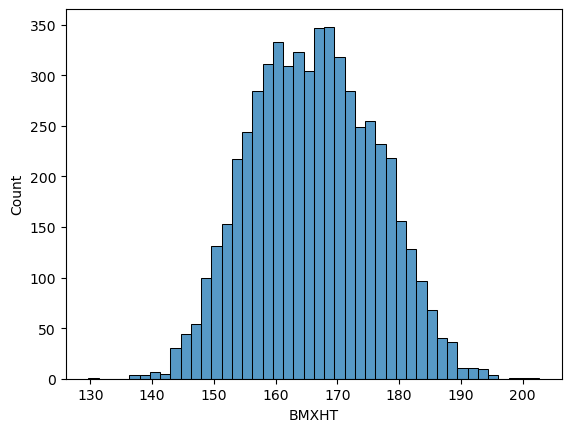

In [15]:
# insert your code here
sns.histplot(da.BMXHT)
plt.show()

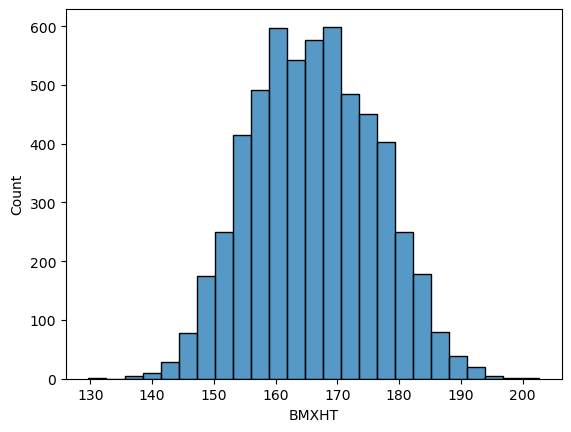

In [16]:
sns.histplot(da.BMXHT,bins= 25)
plt.show()

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

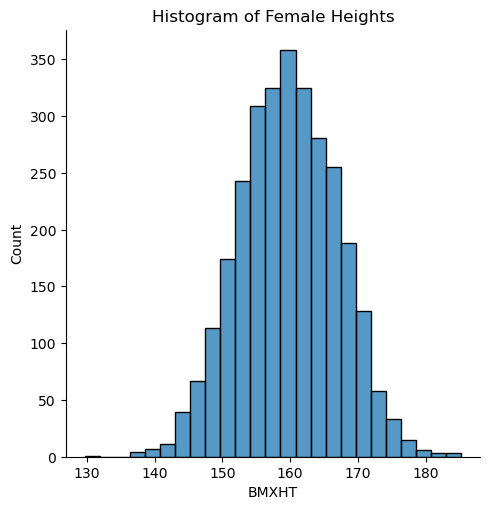

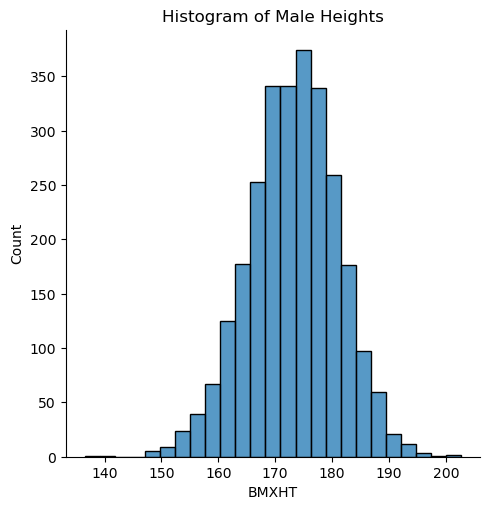

In [17]:
sns.displot(df_female.BMXHT,bins= 25)
plt.title("Histogram of Female Heights")
sns.displot(df_male.BMXHT,bins= 25)
plt.title("Histogram of Male Heights")
plt.show()

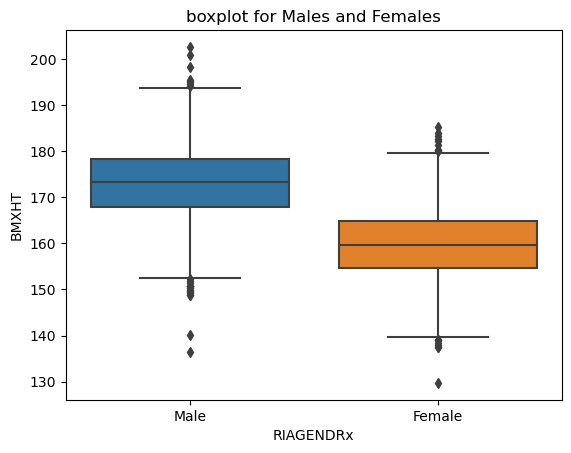

In [18]:
sns.boxplot(x ="RIAGENDRx" , y ="BMXHT" ,data= da)
plt.title("boxplot for Males and Females")
plt.show()

__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

<AxesSubplot: >

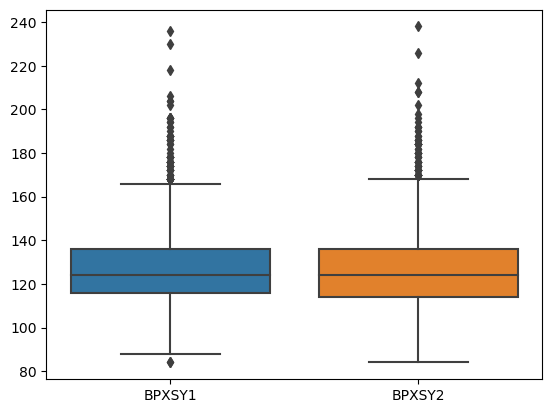

In [37]:
# insert your code here
sns.boxplot(data=df_male.loc[:, ["BPXSY1", "BPXSY2"]])

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [38]:
# insert your code here
diff = da.BPXSY1 - da.BPXSY2
diff = diff.dropna()
diff_flag = (diff > 0)

np.mean(diff_flag)

0.45874464518532315

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

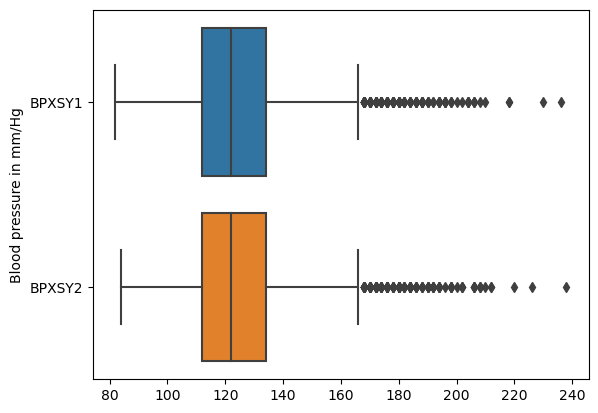

In [39]:
# insert your code here
bp = sns.boxplot(data=da.loc[:, ["BPXSY1", "BPXSY2"]], orient="h")
bp.set_ylabel("Blood pressure in mm/Hg")
plt.show()

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [44]:
# insert your code here
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
x = da.DMDEDUC2x.value_counts()
x/x.sum()

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

In [72]:
dx = da.loc[~da.DMDEDUC2x.isin(["Don't know", "Missing"]), :] 
dx = dx.groupby('DMDHHSIZ')['DMDEDUC2x'].value_counts()
dx = dx /dx.sum()
dx = dx.unstack()
dx


DMDEDUC2x,9-11,<9,College,HS/GED,Some college/AA
DMDHHSIZ,,,,,
1,0.013709,0.013160,0.035642,0.033084,0.044782
2,0.026138,0.026869,0.086821,0.058673,0.079693
3,0.019192,0.017547,0.048437,0.037105,0.057211
4,0.017913,0.015902,0.041309,0.035094,0.050082
5,0.017182,0.017730,0.023762,0.023762,0.036191
6,0.013343,0.012978,0.007311,0.014257,0.014988
7,0.010053,0.015536,0.006397,0.014805,0.013343


__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [89]:
# insert your code here
# we will use our data fram df_30 which has the age group that we intersted in 
# add column to name the education level right
df_30["DMDEDUC2x"] = df_30.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})

dx = df_30.loc[~df_30.DMDEDUC2x.isin(["Don't know", "Missing"]), :] 
dx = dx.groupby(['DMDHHSIZ','RIAGENDRx'])['DMDEDUC2'].median()
dx = dx.unstack(0)
dx

DMDHHSIZ,1,2,3,4,5,6,7
RIAGENDRx,,,,,,,
Female,5.0,5.0,4.0,4.0,4.0,3.0,3.0
Male,4.0,4.0,4.0,4.0,3.0,3.0,3.0


## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [103]:
# insert your code here
# da[['SDMVSTRA','SDMVPSU','RIDAGEYR','BMXHT','BMXBMI','RIAGENDR']]
df_mvu = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])['RIDAGEYR','BMXHT','BMXBMI'].mean()
df_mvu.unstack(2)

C:\Users\engsa\AppData\Local\Temp\ipykernel_4552\1134690773.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mvu = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])['RIDAGEYR','BMXHT','BMXBMI'].mean()


RIDAGEYR                  BMXHT                 BMXBMI  \
RIAGENDRx            Female       Male      Female        Male     Female   
SDMVSTRA SDMVPSU                                                            
119      1        47.663265  47.861111  159.570408  172.741667  30.052041   
         2        52.987952  54.363636  159.244578  172.906818  27.849398   
120      1        43.636364  43.130000  155.402041  169.537755  32.419388   
         2        43.736111  45.219178  159.218056  173.075342  27.400000   
121      1        44.397959  46.750000  158.871579  172.177885  30.856842   
         2        44.376344  42.063158  160.229032  174.764516  26.470968   
122      1        42.897436  44.653061  161.315385  173.998969  29.447436   
         2        47.333333  44.320000  157.231111  170.332323  26.611111   
123      1        44.841121  47.829787  162.059615  174.315217  29.905769   
         2        46.457447  52.126582  160.476596  174.454430  30.641489   
124      1        51.664000  50.750000  158.788710  172.109009  29.533065   
         2        42.541667  48.245614  162.853521  174.291228  28.640845   
125      1        50.900901  55.165289  160.762385  173.631092  30.385321   
         2        51.660000  49.705882  160.021429  174.456863  28.564286   
126      1        46.229167  48.416667  160.387500  175.149398  31.262500   
         2        47.205882  48.666667  160.892000  174.713043  29.612121   
127      1        49.694444  53.137931  157.422430  171.545349  32.189720   
         2        51.486239  54.070588  159.022936  173.366667  30.770642   
128      1        55.638462  53.673267  156.339063  169.325000  32.303125   
         2        45.589744  45.822785  160.437179  172.400000  27.491026   
129      1        45.329787  43.922222  156.900000  171.094318  29.019149   
         2        43.500000  45.775510  161.034259  173.138298  29.429630   
130      1        47.810526  50.516854  161.977895  176.974157  30.700000   
         2        50.833333  50.535354  160.060577  175.061224  31.490385   
131      1        54.893617  53.140187  161.989362  175.610476  30.061702   
         2        45.000000  46.778846  161.673810  175.091346  32.984127   
132      1        43.210526  42.380435  161.508421  172.534066  29.848421   
         2        51.700000  49.038760  159.138281  172.809524  30.540625   
133      1        45.105882  44.054795  158.295122  171.509722  27.959259   
         2        47.063158  47.489796  158.627368  171.179167  29.000000   

                             
RIAGENDRx              Male  
SDMVSTRA SDMVPSU             
119      1        26.958333  
         2        27.160465  
120      1        30.939175  
         2        27.727397  
121      1        29.416505  
         2        26.273118  
122      1        28.528866  
         2        25.744444  
123      1        29.231522  
         2        28.811392  
124      1        28.614414  
         2        27.714035  
125      1        29.727731  
         2        29.143564  
126      1        29.033333  
         2        29.039130  
127      1        31.062353  
         2        30.557831  
128      1        31.749000  
         2        26.835443  
129      1        26.493182  
         2        28.961702  
130      1        30.337079  
         2        29.237755  
131      1        28.259615  
         2        30.077885  
132      1        28.546154  
         2        28.966667  
133      1        27.495833  
         2        27.966667

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [105]:
# insert your code here
df_iqr = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])['RIDAGEYR','BMXHT','BMXBMI']
df_iqr = df_iqr.quantile([0.75]) -df_iqr.quantile([0.25])
df_iqr.unstack(2)

C:\Users\engsa\AppData\Local\Temp\ipykernel_4552\2044913236.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_iqr = da.groupby(['SDMVSTRA','SDMVPSU','RIAGENDRx'])['RIDAGEYR','BMXHT','BMXBMI']


TypeError: GroupBy.quantile() got an unexpected keyword argument 'axis'

__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.